# Bayesian Networks Analysis

`Author: José Luis Maldonado Álvarez`

In [1]:
suppressWarnings(
    suppressPackageStartupMessages({
        library(bnlearn)
        library(Rgraphviz)
        library(gRain)
        library(dplyr)
        library(ggplot2)
    })
)

In [2]:
# Load the dataset
df <- read.csv('FINAL_DATASET_CLUSTERED.csv')

# Select the socioeconomic variables and the outcome variable and convert them to factors
data <- df %>% select(c(starts_with("SE_"), OUT_MACE)) %>% mutate(across(everything(), as.factor))

dim(data) # 16 predictors + 1 outcome variable
str(data)

[1] 2109   17

'data.frame':	2109 obs. of  17 variables:
 $ SE_MS   : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 1 ...
 $ SE_SUP  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_RES  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 2 1 1 1 ...
 $ SE_STU  : Factor w/ 2 levels "1","2": 2 1 2 1 1 1 1 1 2 1 ...
 $ SE_OCC  : Factor w/ 2 levels "1","2": 2 1 2 1 1 1 1 2 2 1 ...
 $ SE_EX   : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 2 2 2 2 ...
 $ SE_HW   : Factor w/ 2 levels "0","1": 1 2 1 2 1 1 1 1 2 1 ...
 $ SE_PET  : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 1 1 1 2 ...
 $ SE_INT  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_TSI  : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 2 2 ...
 $ SE_ACTT : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ SE_SH   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_TEH  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_CCH  : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 2 2 2 ...
 $ SE_ENH  : Factor w/ 2 levels "0","1": 2 2 2 2

## Building BN with Hill-Climbing and Tabu algorithms

BIC score of the DAG learned with hill-climbing: -18724.23 
BIC score of the DAG learned with tabu search: -18724.23 


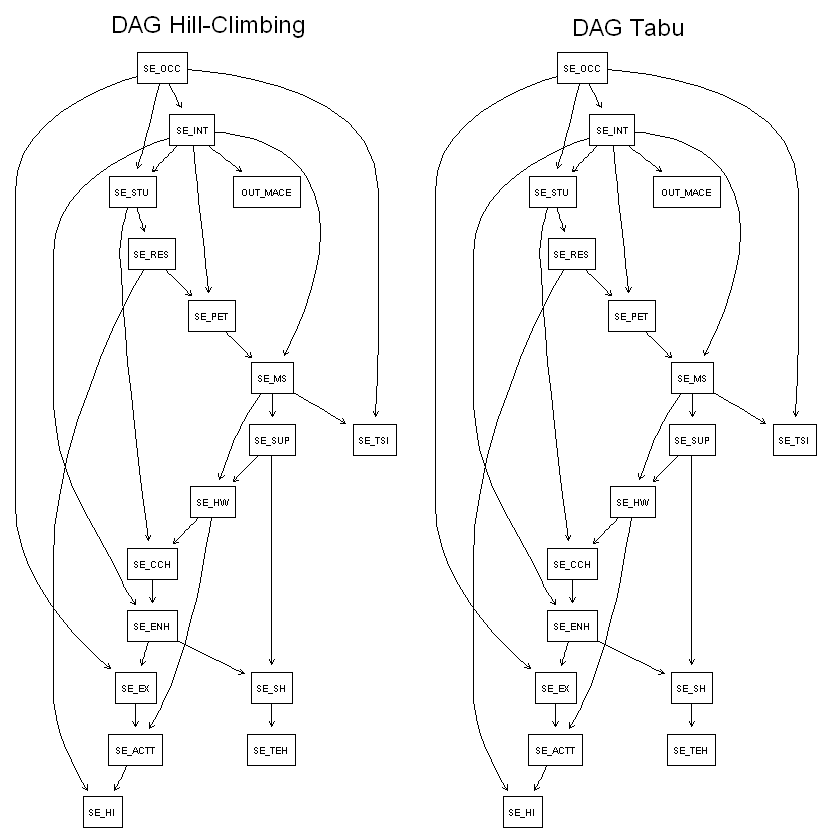

In [3]:
# Learn the DAG using the hill-climbing algorithm
dag_hc <- hc(data, score = "bic")
score_hc <- score(dag_hc, data = data, type = "bic")

# Learn the DAG using the tabu search algorithm
dag_tabu <- tabu(data, score = "bic")
score_tabu <- score(dag_tabu, data = data, type = "bic")

# Compare the scores
cat("BIC score of the DAG learned with hill-climbing:", score_hc, "\n")
cat("BIC score of the DAG learned with tabu search:", score_tabu, "\n")

# Plot the two DAGs for comparison
par(mfrow = c(1, 2), bg = "white")
graphviz.plot(dag_hc, main = "DAG Hill-Climbing")
graphviz.plot(dag_tabu, main = "DAG Tabu")

In [4]:
# Calculate the strength of the relationships between nodes for the restricted models
arc_strength_hc <- arc.strength(dag_hc, data = data, criterion = "x2")
arc_strength_tabu <- arc.strength(dag_tabu, data = data, criterion = "x2")

cat("\nStrength of the relationships (Hill-Climbing with restrictions):\n")
print(arc_strength_hc)

cat("\nStrength of the relationships (Tabu with restrictions):\n")
print(arc_strength_tabu)


Strength of the relationships (Hill-Climbing with restrictions):
      from       to     strength
1   SE_OCC   SE_INT 4.382453e-39
2   SE_INT   SE_STU 4.343418e-28
3    SE_MS    SE_HW 8.297635e-32
4    SE_EX  SE_ACTT 2.363184e-30
5   SE_RES    SE_HI 5.506649e-26
6    SE_MS   SE_SUP 3.441808e-24
7   SE_STU   SE_CCH 6.095607e-20
8   SE_CCH   SE_ENH 6.148273e-11
9   SE_RES   SE_PET 1.107825e-14
10  SE_OCC    SE_EX 9.358499e-15
11  SE_OCC   SE_STU 2.281733e-13
12  SE_STU   SE_RES 6.842506e-10
13  SE_INT OUT_MACE 3.423684e-09
14  SE_ENH    SE_SH 1.706718e-07
15   SE_SH   SE_TEH 4.682568e-16
16  SE_ENH    SE_EX 9.285278e-09
17  SE_INT   SE_ENH 8.678672e-09
18 SE_ACTT    SE_HI 7.145313e-10
19  SE_INT   SE_PET 4.872176e-08
20   SE_HW  SE_ACTT 4.483959e-08
21   SE_HW   SE_CCH 7.940739e-08
22  SE_PET    SE_MS 1.019153e-04
23  SE_SUP    SE_HW 7.205815e-05
24  SE_OCC   SE_TSI 3.458313e-06
25   SE_MS   SE_TSI 7.526604e-05
26  SE_SUP    SE_SH 2.941560e-08
27  SE_INT    SE_MS 3.374530e-04

Strength 

Bayesian Network fitted with Hill-Climbing DAG:
  Parameters of node OUT_MACE (multinomial distribution)

Conditional probability table:
 
        SE_INT
OUT_MACE         0         1
       0 0.7145833 0.8354819
       1 0.2854167 0.1645181
Number of parameters in the fitted model: 59 



Bayesian Network fitted with Tabu DAG:
  Parameters of node OUT_MACE (multinomial distribution)

Conditional probability table:
 
        SE_INT
OUT_MACE         0         1
       0 0.7145833 0.8354819
       1 0.2854167 0.1645181
Number of parameters in the fitted model: 59 


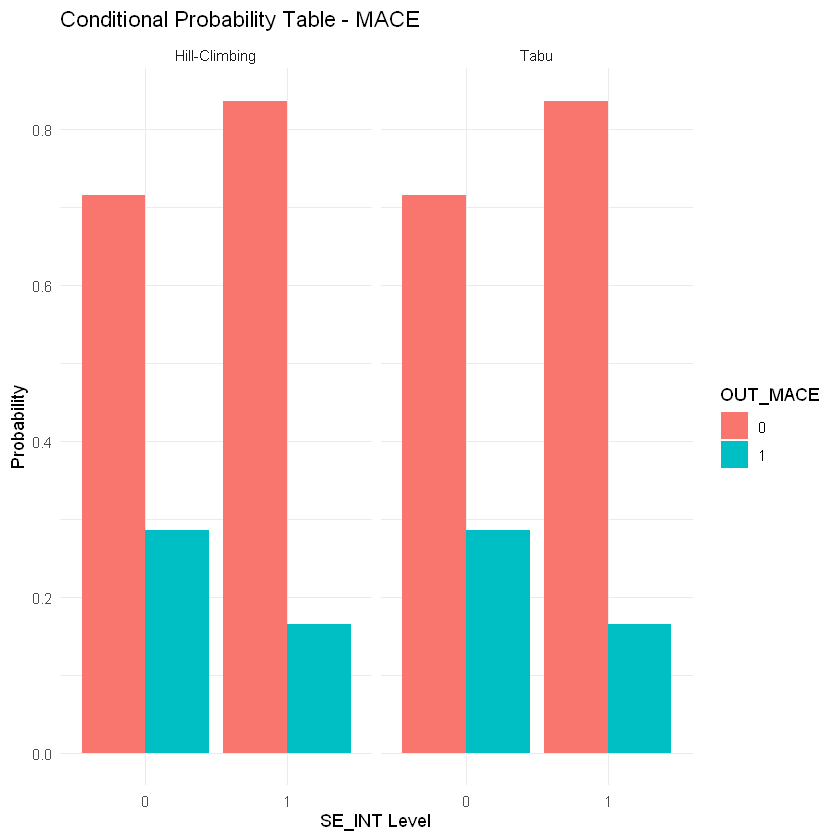

In [6]:
# Fit the Bayesian networks using the learned DAGs
set.seed(1) # For reproducibility

cat("Bayesian Network fitted with Hill-Climbing DAG:")
bn_hc <- bn.fit(dag_hc, data = data)
print(bn_hc$OUT_MACE)
cat("Number of parameters in the fitted model:", suppressWarnings(nparams(bn_hc)), "\n")
df_hc <- as.data.frame(as.table(coef(bn_hc$OUT_MACE)))
df_hc$Method <- "Hill-Climbing"

cat("\nBayesian Network fitted with Tabu DAG:")
bn_tabu <- bn.fit(dag_tabu, data = data)
print(bn_tabu$OUT_MACE)
cat("Number of parameters in the fitted model:", suppressWarnings(nparams(bn_tabu)), "\n")
df_tabu <- as.data.frame(as.table(coef(bn_tabu$OUT_MACE)))
df_tabu$Method <- "Tabu"

# Combine data for both plots
df_combined <- rbind(df_hc, df_tabu)

# Plot both in one using facets
ggplot(df_combined, aes(x = SE_INT, y = Freq, fill = OUT_MACE)) +
       geom_bar(stat = "identity", position = "dodge") +
       facet_wrap(~Method) +
       labs(title = "Conditional Probability Table - MACE",
               x = "SE_INT Level", y = "Probability") +
       theme_minimal()

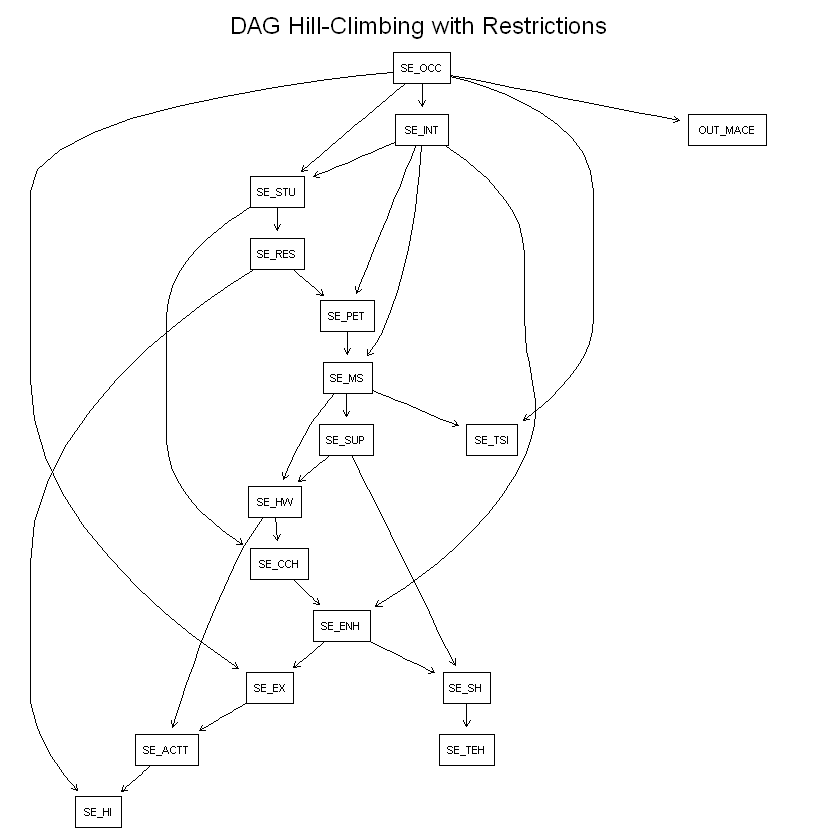

In [7]:
# Learn DAG with restrictions
dag_hc2 <- hc(data, score = "bic", blacklist = matrix(c("SE_INT","OUT_MACE","OUT_MACE","SE_INT"), ncol = 2, byrow = TRUE))
score_hc <- score(dag_hc2, data = data, type = "bic")
par(bg = "white")
graphviz.plot(dag_hc2, main = "DAG Hill-Climbing with Restrictions")

## Bootstrap BN creation 

In [10]:
# Function to color the nodes
color_nodes <- function(nodes, mmarkov, target) {
    sapply(nodes, function(node) {
        if (node %in% mmarkov) {
            "#7FBCC3"
        } else if (node == target) {
            "#53868B"
        } else if (startsWith(node, "SE")) {
            "#e0f2e9"
        } else {
            "white"
        }
    })
}

# Function to draw the final DAG and show the strength of the arcs
draw_final_dag <- function(arcs, nodes, mmarkov, target, data, size){
    arcs <- unique(arcs)
    dag <- empty.graph(nodes)
    arcs(dag) <- arcs
    print(modelstring(dag))
    g <- graphviz.plot(dag, render = FALSE)
    attrs <- list(node = list(shape = "ellipse", fontsize = 30, fillcolor = "lightgrey", style = "filled"),
                  edge = list(arrowsize = 1))
    graph::graphRenderInfo(g) <- attrs
    colors <- color_nodes(nodes, mmarkov, target)
    graph::nodeRenderInfo(g)$fill <- colors
    graph::nodeRenderInfo(g)$col <- "black"
    graph::nodeRenderInfo(g)$textCol <- "black"
    graph::nodeRenderInfo(g)$fontsize <- 30
    variables <- intersect(names(data), nodes)
    data <- data[, variables, drop = FALSE]
    arc_strengths <- suppressWarnings(arc.strength(dag, data = data, criterion = "bic"))
    arc_strengths <- arc_strengths[order(-arc_strengths$strength), ]
    arc_strengths$abs_strength <- abs(as.numeric(sub(".*?(-?\\d+).*", "\\1", as.character(arc_strengths$strength))))
    arc_strengths$width <- cut(arc_strengths$abs_strength, breaks = c(-Inf, 10, 20, 50, 100, 200, Inf), labels = c(1, 2, 3, 4, 5, 6))
    edge_weights <- setNames(as.numeric(arc_strengths$width), paste(arc_strengths$from, arc_strengths$to, sep = "~"))
    edgeRenderInfo(g)$lwd <- edge_weights
    edgeRenderInfo(g)$col <- "black"
    print("Ordered by strength:")
    print(arc_strengths[, c("from", "to", "strength", "abs_strength", "width")])
    Rgraphviz::renderGraph(g)
}

# Function to bootstrap the DAG using 100 iterations (100 by default)
create_dag_bootstrap <- function(data, target, n_iter = 100, seed = 1){
    set.seed(seed)
    results <- list()
    for (i in 1:n_iter) {
        sample <- data[sample(nrow(data), replace = TRUE), ]
        structure <- hc(sample) # Create the structure of the Bayesian Network using hc
        arcs <- arcs(structure)
        nodes <- nodes(structure)
        mmarkov <- mb(structure, node = target)
        results[[i]] <- list(structure = structure, arcs = arcs, nodes = nodes, mmarkov = mmarkov)
    }
    return(results)
}

# Function to calculate the frequency of the arcs
calculate_arc_frequency <- function(results){
    arcs_list <- lapply(results, function(res) {
        arcs <- res$arcs
        data.frame(from = arcs[, 1], to = arcs[, 2])
    })
    combined_arcs <- do.call(rbind, arcs_list)
    arcs_table <- as.data.frame(table(paste(combined_arcs$from, combined_arcs$to, sep = "~")))
    arcs_table <- arcs_table[order(-arcs_table$Freq), ]
    separated_arcs <- as.data.frame(do.call(rbind, strsplit(as.character(arcs_table$Var1), "~")))
    colnames(separated_arcs) <- c("from", "to")
    arcs_table <- cbind(separated_arcs, arcs_table$Freq)
    colnames(arcs_table) <- c("from", "to", "Freq")
    return(arcs_table)
}

# Function to check if an arc exists in the graph, we will use it to avoid some arcs (MH_AGE -> XX_XXXX ; MH_SEX -> XX_XXXX)
arc_exists <- function(graph, from, to) {
    present_arc <- arcs(graph)
    return(any(present_arc[, 1] == from & present_arc[, 2] == to) ||
                 any(present_arc[, 1] == to & present_arc[, 2] == from))
}

# Function to create the final network
create_final_network <- function(arc_frequency, threshold = 50) {
    filtered_arcs <- arc_frequency %>% filter(Freq >= threshold)
    nodes <- unique(c(filtered_arcs$from, filtered_arcs$to))
    final_network <- empty.graph(nodes)
    for (i in 1:nrow(filtered_arcs)) {
        from <- as.character(filtered_arcs$from[i])
        to <- as.character(filtered_arcs$to[i])
        if (!is.null(from) && !is.null(to) && !arc_exists(final_network, from, to)) {
            if (to != "MH_AGE" && to != "MH_SEX") {
                try(final_network <- set.arc(final_network, from, to), silent = TRUE)
            }
        }
    }
    return(final_network)
}

# Function to calculate the number of parameters in the network
calculate_number_of_parameters <- function(bn_object) {
    params <- nparams(bn_object)
    return(params)
}

# Function to calculate the probabilities
calculate_probabilities <- function(bn_fitted, variable) {
    cpt <- bn_fitted[[variable]]
    return(cpt)
}

# Function to compare two variables with a barplot and a chi-square test
compare_variables <- function(data, variable1, variable2){
    test_result <- ci.test(variable1, variable2, data = data)
    print(test_result)
    table <- table(data[, variable1], data[, variable2])
    barplot(table, beside = TRUE, legend = TRUE, col = rainbow(nrow(table)), 
                    xlab = variable2, ylab = "Frequency", main = paste("Distribution of", variable1, "over", variable2))
}

# Function to create a bar chart for a specific variable using bn.fit.barchart
create_barchart <- function(bn_fitted, variable) {
    bn.fit.barchart(bn_fitted[[variable]])
}

# MAIN FUNCTION
perform_analysis <- function(data, target, n_iter = 100, threshold = 40, seed = 1){
    bootstrap_results <- create_dag_bootstrap(data, target, n_iter, seed)
    arc_frequency <- calculate_arc_frequency(bootstrap_results)
    print(arc_frequency)
    BNet <- create_final_network(arc_frequency, threshold)
    print(arcs(BNet))
    network_variables <- nodes(BNet)
    final_data <- data[, network_variables, drop = FALSE]
    bn_fitted <- bn.fit(BNet, data = final_data, method = "bayes")
    number_of_parameters <- calculate_number_of_parameters(bn_fitted)
    print(number_of_parameters)
    draw_final_dag(arcs(BNet), nodes(BNet), mb(BNet, target), target, final_data, size = 15)
    grain_network <- as.grain(bn_fitted) # Convert to gRain network for queries
    junction <- compile(grain_network)
    
    # Create bar chart for the target variable using bn.fit.barchart
    create_barchart(bn_fitted, target)
    
    return(list(BNet = BNet, bn_fitted = bn_fitted, final_data = final_data, junction = junction))
}

        from       to Freq
1      SE_EX  SE_ACTT   99
2      SE_MS   SE_SUP   99
3      SE_SH   SE_TEH   98
4     SE_RES    SE_HI   97
5     SE_STU   SE_CCH   97
6     SE_INT OUT_MACE   95
7    SE_ACTT    SE_HI   94
8     SE_OCC    SE_EX   90
9      SE_MS    SE_HW   88
10    SE_INT   SE_ENH   87
11    SE_CCH   SE_ENH   79
12     SE_HW  SE_ACTT   79
13    SE_ENH    SE_SH   78
14    SE_RES   SE_PET   78
15    SE_ENH    SE_EX   76
16    SE_OCC   SE_INT   70
17    SE_OCC   SE_STU   65
18    SE_INT   SE_STU   56
19    SE_PET    SE_MS   53
20    SE_SUP    SE_SH   52
21    SE_INT   SE_CCH   50
22    SE_OCC   SE_TSI   49
23     SE_HW   SE_SUP   48
24    SE_RES   SE_STU   47
25    SE_STU   SE_RES   45
26    SE_CCH    SE_SH   44
27    SE_INT    SE_MS   44
28    SE_STU   SE_INT   44
29     SE_HW   SE_CCH   43
30    SE_SUP    SE_HW   42
31    SE_PET   SE_INT   38
32    SE_STU   SE_OCC   35
33    SE_CCH    SE_HW   31
34    SE_ENH   SE_TSI   31
35    SE_PET   SE_OCC   31
36    SE_INT   SE_OCC   30
3

Warning message in nparams(bn_object):
"the effective argument is deprecated and will be removed in 2025."


[1] 66
[1] "[SE_RES][SE_OCC][SE_INT|SE_OCC][SE_PET|SE_RES][SE_TSI|SE_OCC][SE_MS|SE_INT:SE_PET][SE_STU|SE_RES:SE_INT:SE_OCC][OUT_MACE|SE_INT][SE_HW|SE_MS][SE_CCH|SE_STU:SE_INT:SE_HW][SE_SUP|SE_MS:SE_HW][SE_ENH|SE_INT:SE_CCH][SE_EX|SE_OCC:SE_ENH][SE_SH|SE_CCH:SE_ENH:SE_SUP][SE_ACTT|SE_EX:SE_HW][SE_TEH|SE_SH][SE_HI|SE_RES:SE_ACTT]"
[1] "Ordered by strength:"
      from       to      strength abs_strength width
25  SE_CCH    SE_SH    6.11863146            6     1
20  SE_SUP    SE_SH    3.93546147            3     1
13  SE_ENH    SE_SH    2.58401455            2     1
21  SE_INT   SE_CCH    0.07313752            0     1
26  SE_INT    SE_MS   -0.16449048            0     1
19  SE_PET    SE_MS   -1.75201100            1     1
27   SE_HW   SE_CCH   -2.59742338            2     1
22  SE_OCC   SE_TSI   -4.15343249            4     1
23   SE_HW   SE_SUP   -4.56217728            4     1
24  SE_RES   SE_STU   -6.34187935            6     1
12   SE_HW  SE_ACTT   -9.42364886            9     1
7  SE_

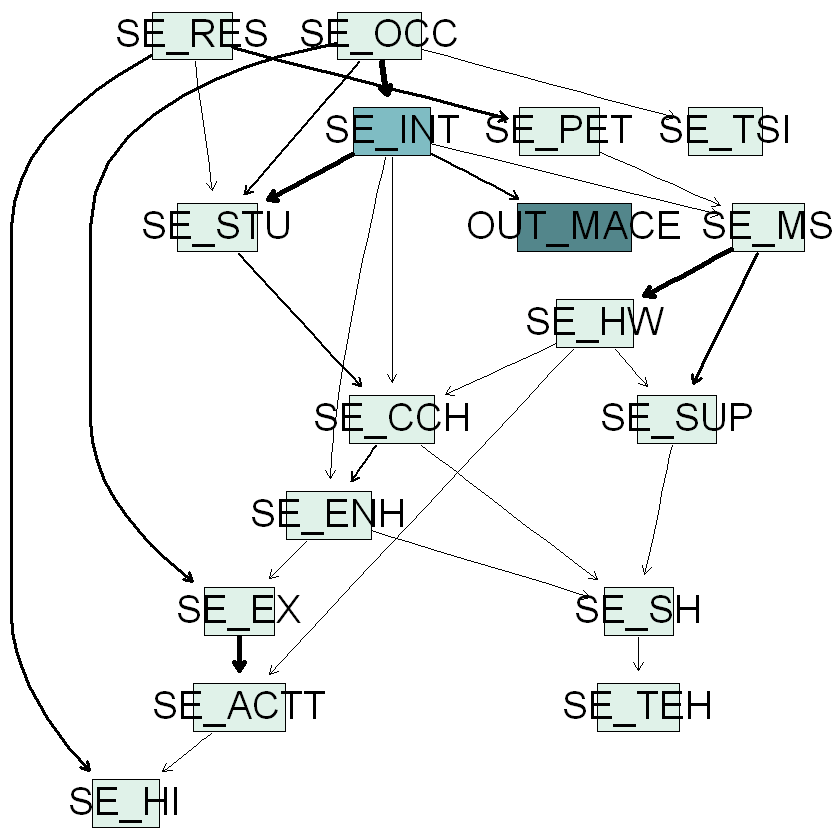

$BNet

  Random/Generated Bayesian network

  model:
   [SE_RES][SE_OCC][SE_INT|SE_OCC][SE_PET|SE_RES][SE_TSI|SE_OCC]
   [SE_MS|SE_INT:SE_PET][SE_STU|SE_RES:SE_INT:SE_OCC][OUT_MACE|SE_INT]
   [SE_HW|SE_MS][SE_CCH|SE_STU:SE_INT:SE_HW][SE_SUP|SE_MS:SE_HW]
   [SE_ENH|SE_INT:SE_CCH][SE_EX|SE_OCC:SE_ENH][SE_SH|SE_CCH:SE_ENH:SE_SUP]
   [SE_ACTT|SE_EX:SE_HW][SE_TEH|SE_SH][SE_HI|SE_RES:SE_ACTT]
  nodes:                                 17 
  arcs:                                  27 
    undirected arcs:                     0 
    directed arcs:                       27 
  average markov blanket size:           4.35 
  average neighbourhood size:            3.18 
  average branching factor:              1.59 

  generation algorithm:                  Empty 


$bn_fitted

  Bayesian network parameters

  Parameters of node SE_EX (multinomial distribution)

Conditional probability table:
 
, , SE_ENH = 0

     SE_OCC
SE_EX         1         2
    0 0.3807018 0.5554855
    1 0.6192982 0.4445145

,

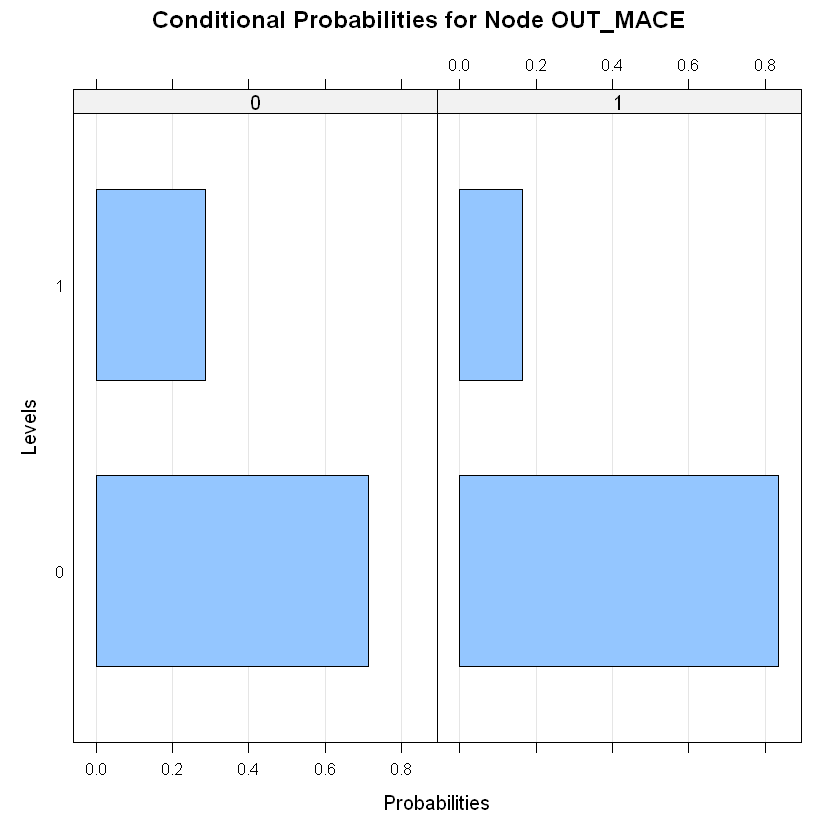

In [11]:
perform_analysis(data, "OUT_MACE", n_iter = 100, threshold = 40, seed = 1)